In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_churn_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3333 non-null   int64  
 1   account length               3333 non-null   int64  
 2   area code                    3333 non-null   int64  
 3   international plan           3333 non-null   int64  
 4   voice mail plan              3333 non-null   int64  
 5   number vmail messages        3333 non-null   int64  
 6   total day minutes            3333 non-null   float64
 7   total day calls              3333 non-null   int64  
 8   total day charge             3333 non-null   float64
 9   total eve minutes            3333 non-null   float64
 10  total eve calls              3333 non-null   int64  
 11  total eve charge             3333 non-null   float64
 12  total night minutes          3333 non-null   float64
 13  total night calls 

In [4]:
df.drop(columns=['Unnamed: 0'], axis = 1, inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   account length               3333 non-null   int64  
 1   area code                    3333 non-null   int64  
 2   international plan           3333 non-null   int64  
 3   voice mail plan              3333 non-null   int64  
 4   number vmail messages        3333 non-null   int64  
 5   total day minutes            3333 non-null   float64
 6   total day calls              3333 non-null   int64  
 7   total day charge             3333 non-null   float64
 8   total eve minutes            3333 non-null   float64
 9   total eve calls              3333 non-null   int64  
 10  total eve charge             3333 non-null   float64
 11  total night minutes          3333 non-null   float64
 12  total night calls            3333 non-null   int64  
 13  total night charge

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [8]:
X = df.drop(columns=['churn'], axis = 1)
y = df['churn']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
decision_tree_baseline_clf = DecisionTreeClassifier()

In [12]:
decision_tree_baseline_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
baseline_tree_preds = decision_tree_baseline_clf.predict(X_test)

In [14]:
print(classification_report(y_test, baseline_tree_preds))

              precision    recall  f1-score   support

       False       0.94      0.96      0.95       706
        True       0.77      0.68      0.72       128

    accuracy                           0.92       834
   macro avg       0.86      0.82      0.84       834
weighted avg       0.92      0.92      0.92       834



In [15]:
confusion_matrix(y_test, baseline_tree_preds)

array([[680,  26],
       [ 41,  87]])

In [17]:
text_representation = tree.export_text(decision_tree_baseline_clf)

In [19]:
print(text_representation)

|--- feature_5 <= 264.45
|   |--- feature_17 <= 3.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_7 <= 37.95
|   |   |   |   |--- feature_10 <= 27.99
|   |   |   |   |   |--- feature_4 <= 43.50
|   |   |   |   |   |   |--- feature_0 <= 224.50
|   |   |   |   |   |   |   |--- feature_13 <= 15.91
|   |   |   |   |   |   |   |   |--- feature_10 <= 14.52
|   |   |   |   |   |   |   |   |   |--- feature_15 <= 14.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 191.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  191.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_15 >  14.00
|   |   |   |   |   |   |   |   |   |   |--- feature_13 <= 7.95
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |   |--- feature_13 >  7.95
|   |   |   |   |   |   |   |   |   |   |

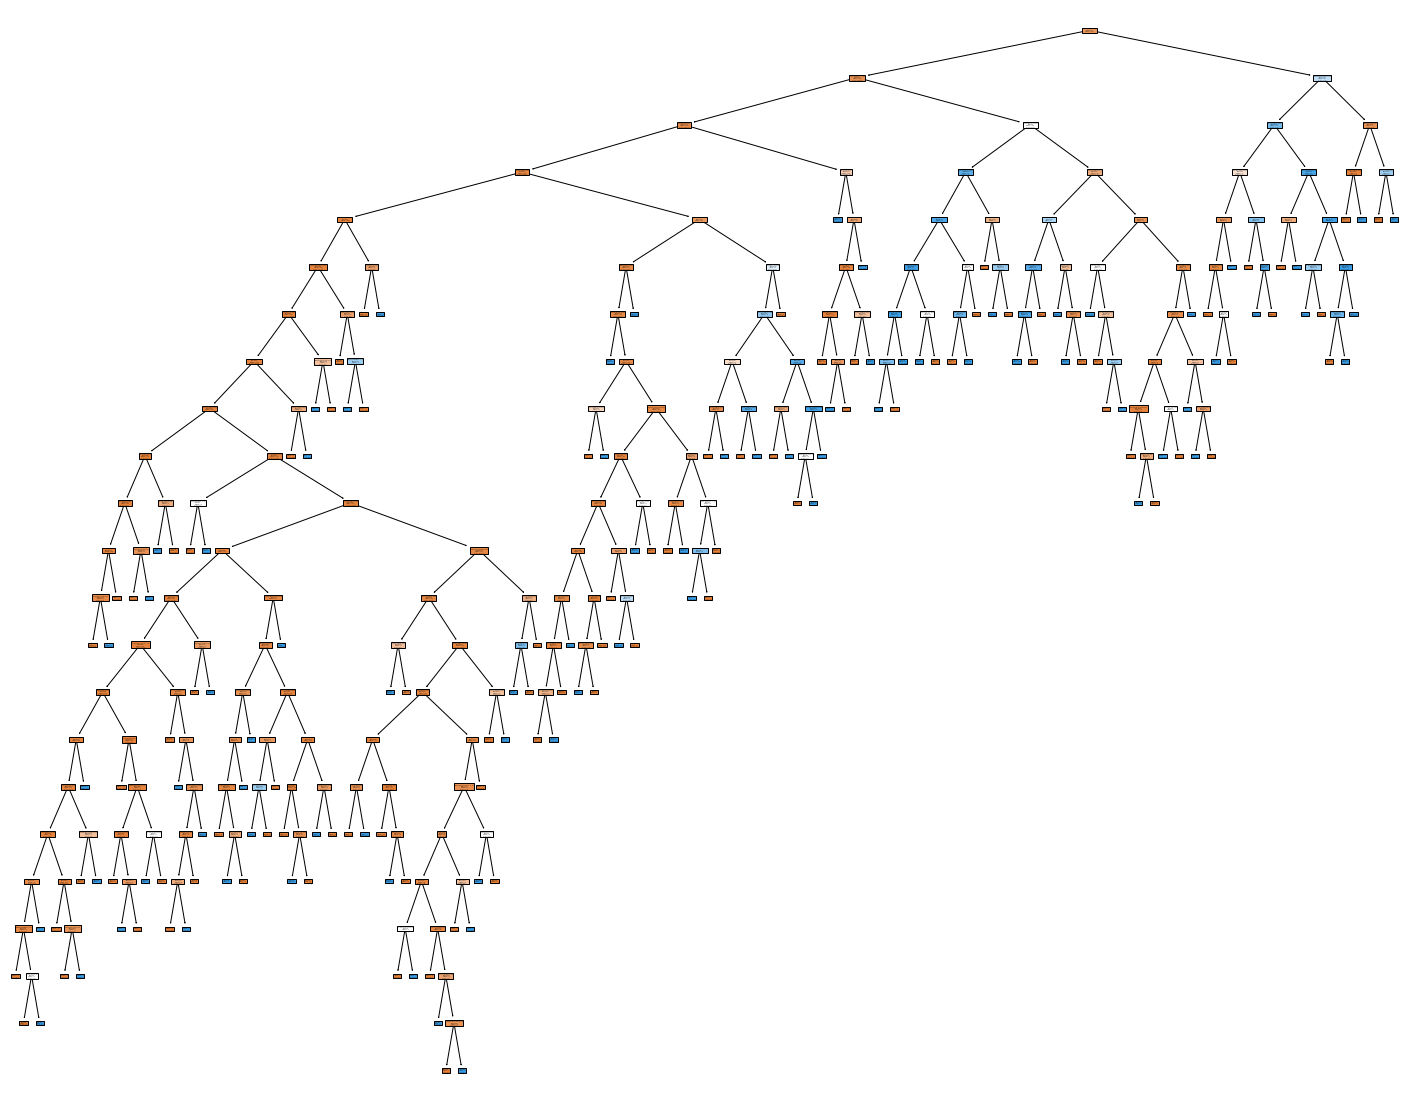

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_baseline_clf, 
                   feature_names=df.columns,
                   filled=True)

In [21]:
dtree_depth_clf = DecisionTreeClassifier(max_depth= 13)

In [22]:
dtree_depth_clf.fit(X_train, y_train)
dtree_depth_preds = dtree_depth_clf.predict(X_test)

In [23]:
print(classification_report(y_test, dtree_depth_preds))

              precision    recall  f1-score   support

       False       0.94      0.98      0.96       706
        True       0.84      0.67      0.75       128

    accuracy                           0.93       834
   macro avg       0.89      0.82      0.85       834
weighted avg       0.93      0.93      0.93       834



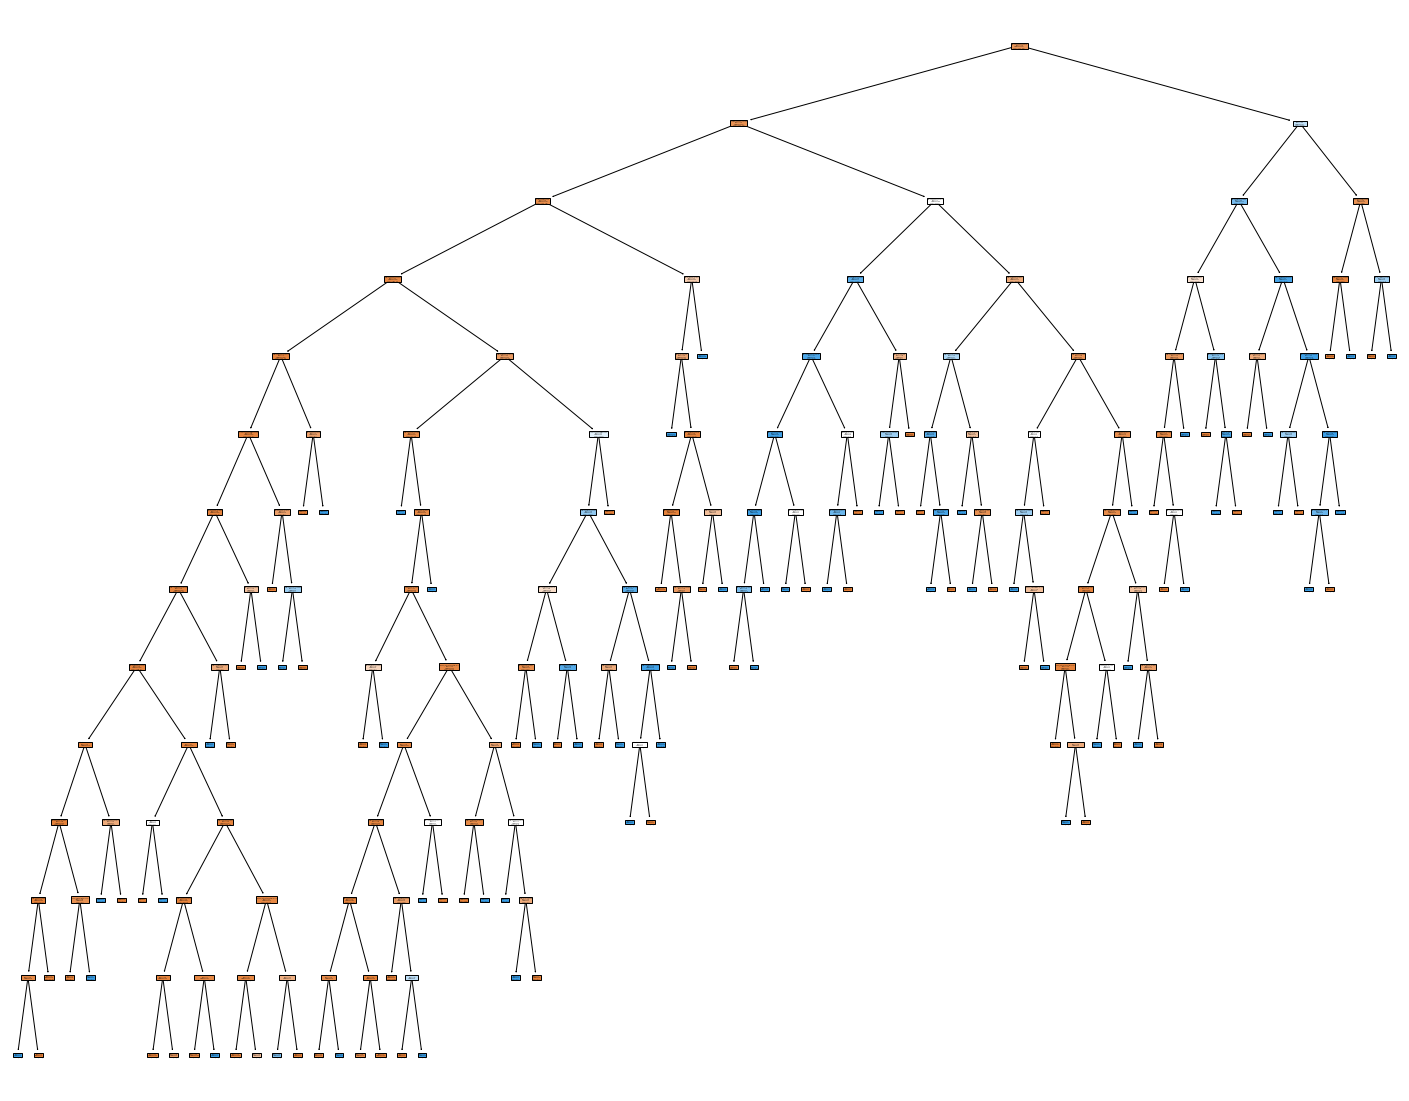

In [25]:
text_representation = tree.export_text(decision_tree_baseline_clf)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree_depth_clf, 
                   feature_names=df.columns,
                   filled=True)

In [26]:
dtree_depth2_clf = DecisionTreeClassifier(max_depth= 9)

In [27]:
dtree_depth2_clf.fit(X_train, y_train)
dtree_depth2_preds = dtree_depth2_clf.predict(X_test)

In [28]:
print(classification_report(y_test, dtree_depth2_preds))

              precision    recall  f1-score   support

       False       0.94      0.99      0.97       706
        True       0.94      0.66      0.78       128

    accuracy                           0.94       834
   macro avg       0.94      0.83      0.87       834
weighted avg       0.94      0.94      0.94       834



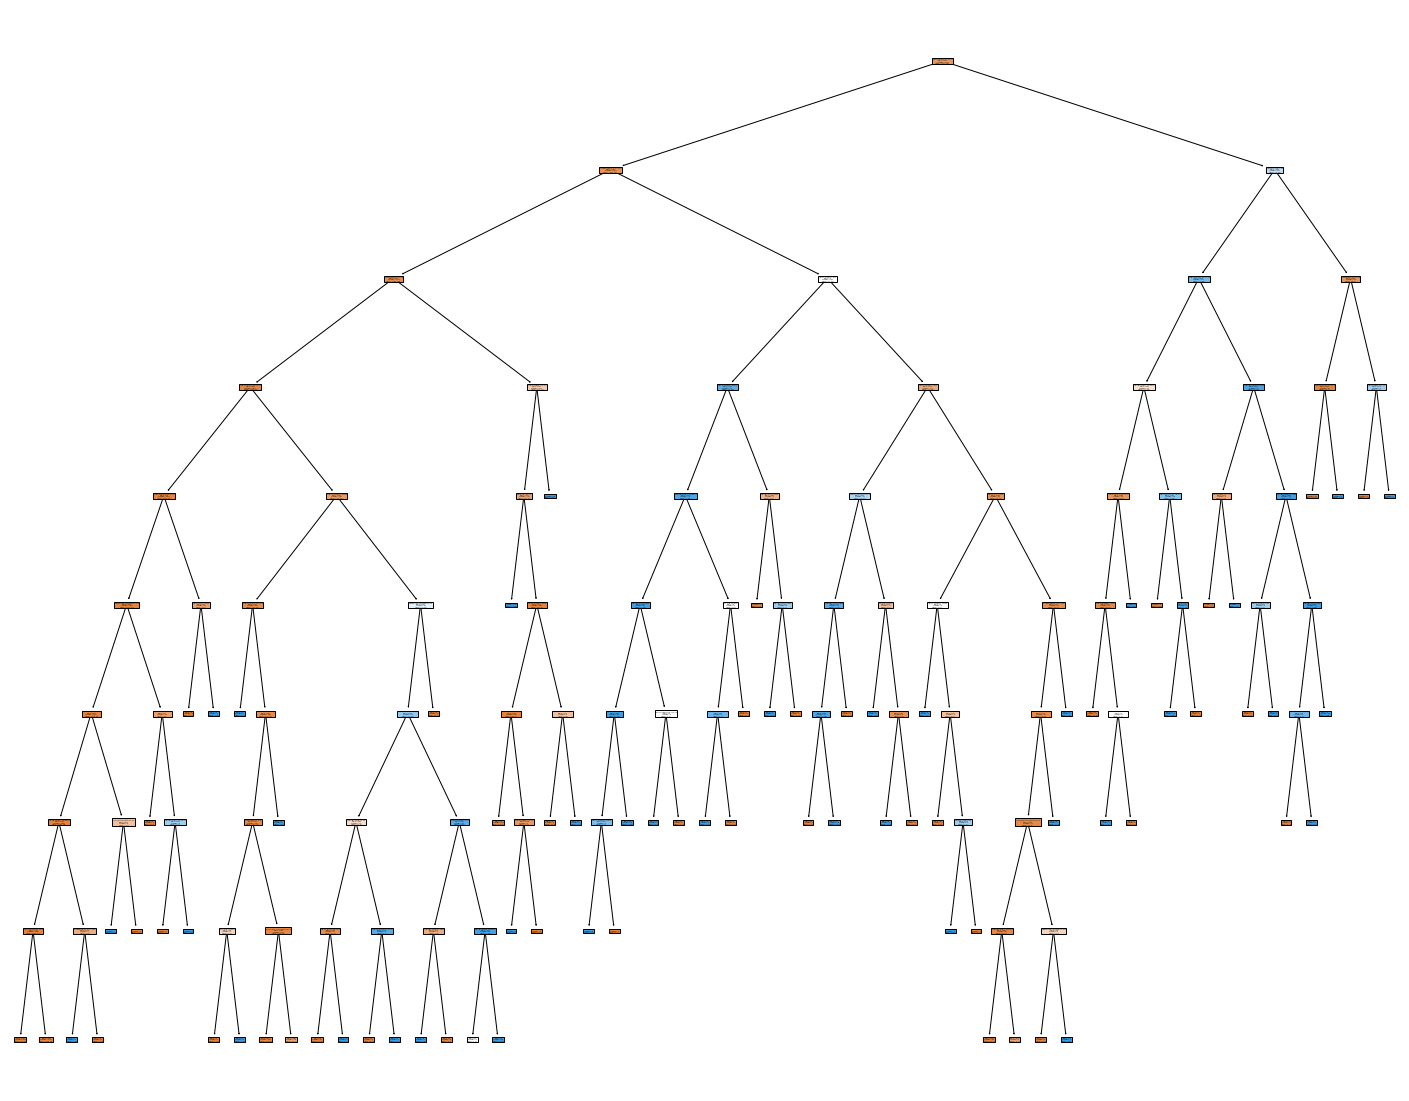

In [29]:
text_representation = tree.export_text(dtree_depth2_clf)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree_depth2_clf, 
                   feature_names=df.columns,
                   filled=True)

In [31]:
import graphviz

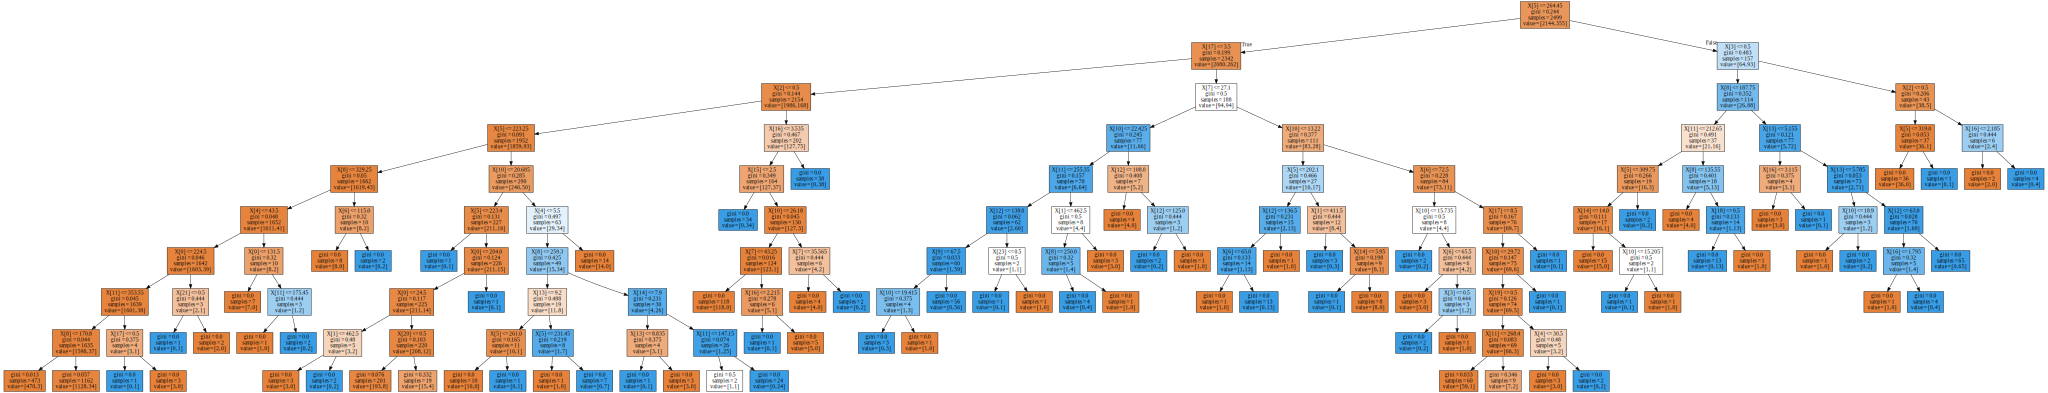

In [32]:
dot_data = tree.export_graphviz(dtree_depth2_clf, out_file=None,   
                                filled=True)
graphviz.Source(dot_data, format="png")